# Demo: Gaussian processes under monotonicity constraints

In this notebook, we propose a demo example of the implementation of a Gaussian process (GP) under monotonicity constraints. The model is constructed via the MaxMod algorithm proposed in [1]

[1] F. Bachoc, A. F. López-Lopera, and O. Roustant. *Sequential construction and dimension reduction of Gaussian
processes under inequality constraints*. 2020. URL: https://arxiv.org/abs/2009.04188.

In [1]:
# loading useful libraries
library("lineqGPR")
require("DiceDesign")
library("plot3D")
library("viridis")

rm(list=ls())
options(warn=-1)

Warning message:
"package 'lineqGPR' was built under R version 4.0.4"
Loading required package: broom

Warning message:
"package 'broom' was built under R version 4.0.4"
Loading required package: nloptr

Loading required package: purrr

Loading required package: DiceDesign

Warning message:
"package 'DiceDesign' was built under R version 4.0.4"
Loading required package: viridisLite



In [2]:
# Synthetic data: monotonic function
modatan <- function(x, a) return(atan(a*x))
targetFun <- function(x, d) {
  y <- 0
  a <- (1-(1:d)/(d+1))*5
  for (k in 1:d)
    y <- y + modatan(x[, k], a[k])
  return(y)
}

In [3]:
D <- 5 # number of active + inactive input variables
d <- 2 # number of active input variables

# building DoE in dimension D via Latin hypercube sampling (LHS)
nbtrain <- 20*D # nb of training data
xdesign <- lhsDesign(nbtrain, D, seed = 8)$design
xdesign <- maximinSA_LHS(xdesign)$design
ydesign <- targetFun(xdesign, d)

# building a DoE for assessing the model
ntest <- 80*D # nb of test data for the MaxMod criterion
xtest <- lhsDesign(ntest, D, seed = 8)$design
xtest <- maximinSA_LHS(xtest)$design

In [4]:
# initializing a 1D GP model with only two knots 
model <-  create(class = 'lineqMaxModGP',
                 x = rep(0, nbtrain), y = ydesign,
                 constrType = c("monotonicity"))
model$localParam$m <- 2
model$uinit <- lapply(1:D, function(x) seq(0, 1, length.out = model$localParam$m))
model$varnoise <- var(ydesign)
model$kernParam$nugget <- 1e-5

In [5]:
# updating the model according to the MaxMod algorithm
model <- MaxMod(model,
                xdesign,
                xtest,
                D = D,
                tol = 1e-5,
                max_iter = 10*model$d,
                reward_new_knot = 1e-6,
                reward_new_dim = 1e-9,
                print_iter = TRUE,
                nClusters = 10,
                save_history = TRUE)

message("\nNumber of active dimensions: ", d)
message("Number of actived dimensions via MaxMod: ", model$d, "\n")

                    dim 1    dim 2    dim 3    dim 4    dim 5
MaxMod criterion 1.224175 1.218699 1.179208 1.177648 1.177618
knot's position       NaN      NaN      NaN      NaN      NaN
decision         1.000000 0.000000 0.000000 0.000000 0.000000


Iter 1 - dimension 1 added as d = 1 (MaxMod criterion = 1.22417501911793)



                      dim 1      dim 2        dim 3        dim 4     dim 5
MaxMod criterion 0.01929934 0.04792809 0.0001420925 0.0005257585 0.0003219
knot's position  0.38289803        NaN          NaN          NaN       NaN
decision         0.00000000 1.00000000 0.0000000000 0.0000000000 0.0000000


Iter 2 - dimension 2 added as d = 2 (MaxMod criterion = 0.0479280915949658)



                       dim 1       dim 2        dim 3        dim 4        dim 5
MaxMod criterion 0.006794792 0.002083112 0.0001107679 7.457895e-05 2.856565e-05
knot's position  0.387948087 0.401963016          NaN          NaN          NaN
decision         1.000000000 0.000000000 0.0000000000 0.000000e+00 0.000000e+00


Iter 3 - New knot added: d = 1 (MaxMod criterion = 0.00679479216792167)



                        dim 1       dim 2        dim 3        dim 4
MaxMod criterion 5.236616e-05 0.001063286 7.126979e-05 2.696419e-05
knot's position  6.873642e-01 0.459725552          NaN          NaN
decision         0.000000e+00 1.000000000 0.000000e+00 0.000000e+00
                        dim 5
MaxMod criterion 1.594172e-05
knot's position           NaN
decision         0.000000e+00


Iter 4 - New knot added: d = 2 (MaxMod criterion = 0.00106328550109741)



                        dim 1        dim 2        dim 3        dim 4
MaxMod criterion 4.742941e-05 3.591556e-05 2.637898e-05 5.199535e-06
knot's position  7.513662e-01 6.762894e-01          NaN          NaN
decision         1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
                        dim 5
MaxMod criterion 9.179307e-06
knot's position           NaN
decision         0.000000e+00


Iter 5 - New knot added: d = 1 (MaxMod criterion = 4.74294056228348e-05)



                        dim 1        dim 2        dim 3        dim 4
MaxMod criterion 0.0002100842 2.853189e-05 1.534378e-05 4.131272e-06
knot's position  0.2132356442 6.698371e-01          NaN          NaN
decision         1.0000000000 0.000000e+00 0.000000e+00 0.000000e+00
                        dim 5
MaxMod criterion 8.518938e-06
knot's position           NaN
decision         0.000000e+00


Iter 6 - New knot added: d = 1 (MaxMod criterion = 0.000210084175922863)



                        dim 1        dim 2        dim 3        dim 4
MaxMod criterion 1.124038e-05 1.794553e-05 7.648012e-06 1.185838e-06
knot's position  6.009299e-01 7.039008e-01          NaN          NaN
decision         0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
                        dim 5
MaxMod criterion 1.723864e-06
knot's position           NaN
decision         0.000000e+00


Iter 7 - New knot added: d = 2 (MaxMod criterion = 1.79455339766526e-05)



                        dim 1        dim 2        dim 3        dim 4
MaxMod criterion 8.448796e-06 3.235447e-05 6.062107e-06 1.673104e-06
knot's position  5.388241e-01 1.285831e-01          NaN          NaN
decision         0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
                        dim 5
MaxMod criterion 1.858297e-06
knot's position           NaN
decision         0.000000e+00


Iter 8 - New knot added: d = 2 (MaxMod criterion = 3.23544665059667e-05)



                        dim 1        dim 2        dim 3        dim 4
MaxMod criterion 1.614464e-05 2.128111e-05 5.648488e-06 2.968942e-06
knot's position  6.272510e-01 2.056282e-01          NaN          NaN
decision         0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
                        dim 5
MaxMod criterion 8.261117e-06
knot's position           NaN
decision         0.000000e+00


Iter 9 - New knot added: d = 2 (MaxMod criterion = 2.12811139487102e-05)



                        dim 1        dim 2        dim 3        dim 4
MaxMod criterion 1.648198e-05 2.127745e-06 5.070316e-06 2.849696e-06
knot's position  6.506193e-01 3.496223e-01          NaN          NaN
decision         1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
                        dim 5
MaxMod criterion 7.199773e-06
knot's position           NaN
decision         0.000000e+00


Iter 10 - New knot added: d = 1 (MaxMod criterion = 1.64819797380224e-05)

Run out of budget


Number of active dimensions: 2

Number of actived dimensions via MaxMod: 2




In [6]:
# evaluating the model using an equispaced grid of points
ntest <- 10
xtestGrid  <- as.matrix(expand.grid(seq(0, 1, length = ntest), seq(0, 1, length = ntest)))
ytestGrid <- targetFun(xtestGrid, d)
pred <- predict(model, xtestGrid)

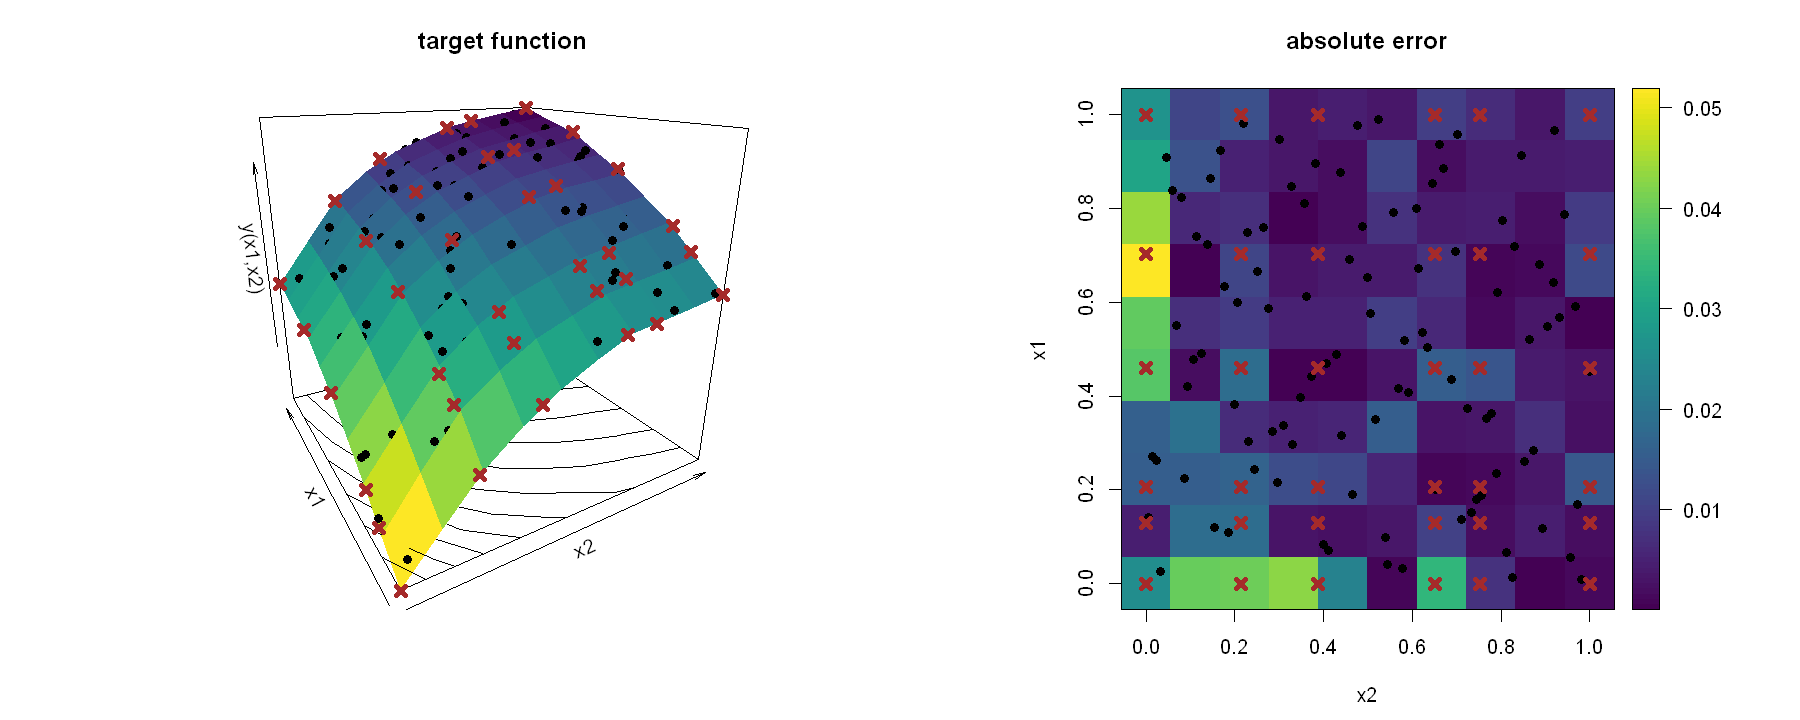

In [7]:
# plotting the MAP estimate
colormap <- rev(viridis(1e2))
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1,2))
p <- persp3D(x = seq(0, 1, length = ntest), y = seq(0, 1, length = ntest),
             z = matrix(pred$Phi.test %*% pred$xi.map, nrow = ntest),
             xlab = "x2", ylab = "x1", zlab = "y(x1,x2)",
             main = "target function",
             phi = 20, theta = -30, col = colormap,
             contour = TRUE, colkey=FALSE, lwd = 4)
points3D(x = model$x[, 1], y = model$x[, 2], z = ydesign,
         col = 'black', pch = 19, add=TRUE)
u <- expand.grid(model$u[[1]], model$u[[2]])
pred_Knots <- predict(model, as.matrix(u))
points(trans3D(x = u[, 1], y = u[, 2], z = pred_Knots$Phi.test %*% pred_Knots$xi.map, pmat = p),
         col = 'brown', pch = 4, lwd = 4)

diff = ytestGrid - pred$Phi.test %*% pred$xi.map
image2D(abs(matrix(diff, nrow = ntest)), col = rev(colormap),
        main = "absolute error", xlab = "x2", ylab = "x1")
points2D(model$x[, 1], model$x[, 2], add = TRUE, pch = 19, col ='black')
points2D(u[, 1], u[, 2], add = TRUE, pch = 4, lwd = 4, col ='brown')